<a href="https://colab.research.google.com/github/Raunak-Kumar7/Parameter_Optimisation_of_SVM/blob/main/Parameter_optimisation_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [4]:
from google.colab import files
uploaded = files.upload()

In [66]:
dataset = pd.read_csv('Crowd_source_mapping.csv')
dataset.head()

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,...,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,water,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,water,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,...,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810
3,water,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,...,-1025.880,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550
4,water,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727


In [71]:
dataset['id'] = dataset.groupby(['class']).ngroup()


In [72]:
dataset

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,id
0,water,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,...,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906,5
1,water,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075,5
2,water,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,...,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810,5
3,water,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,...,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550,5
4,water,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10540,impervious,7579.580,6072.5000,3803.140,3902.220,3897.43,3767.050,3985.770,4122.540,4240.230,...,5513.730,1538.240,3507.360,1099.800,461.336,406.031,4652.03,2774.980,500.864,3
10541,impervious,2780.930,1895.6800,1454.740,1265.480,1033.56,1930.380,1057.150,1471.600,1427.340,...,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.65,2501.720,1247.770,3
10542,impervious,5833.760,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,...,4047.320,4515.800,433.177,277.296,744.143,315.503,3759.71,3267.170,388.346,3
10543,impervious,3079.310,2435.3000,1444.400,1133.760,1278.74,927.765,1917.040,1514.920,1685.130,...,2050.940,1848.100,1725.820,1935.410,2089.710,668.160,1880.59,1614.840,1518.980,3


###Pre-Processing of Dataset

In [67]:
dataset.shape

(10545, 29)

In [68]:
dataset.isnull().sum()

class         0
max_ndvi      0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [39]:
dataset = dataset.dropna(axis=0,how='any')

In [76]:
dataset = dataset.drop(['class'],axis=1)

<Axes: xlabel='id', ylabel='count'>

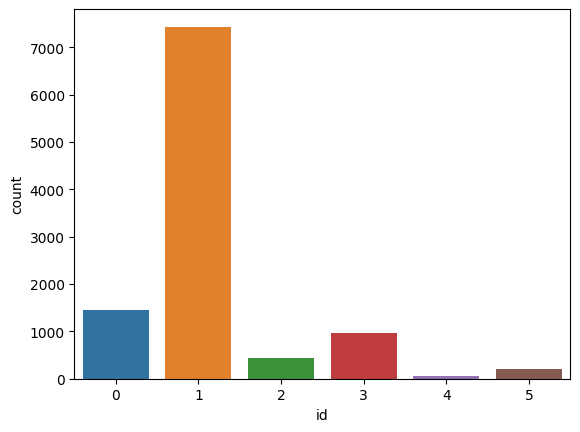

In [73]:
sns.countplot(x = 'id', data=dataset)

In [77]:
X = dataset.iloc[:,0:-1]
y = dataset['id']

In [78]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-3.91893176, -2.22267944, -1.50588418, ..., -4.2747433 ,
        -1.60265196, -0.88038604],
       [-3.97112709, -2.22414846, -1.52963565, ..., -4.29890349,
        -1.67986707, -0.84302943],
       [-2.17116458, -1.77004429, -1.30544946, ..., -1.72111221,
        -1.03280855,  0.51450683],
       ...,
       [-0.90350763, -0.98434905, -1.27750182, ..., -1.20831762,
         0.30123115, -0.89926133],
       [-2.6210598 , -1.43553708, -1.2186085 , ..., -2.174684  ,
        -0.40611955, -0.43084486],
       [ 0.04355455,  0.53741003, -1.13690444, ..., -0.06488965,
        -0.5624291 , -0.05580394]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [79]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [80]:
samples

[(       max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  20150415_N  \
  6444    8307.48     7837.87     7878.65    8185.800     8307.48    7831.860   
  10063   3195.67     2660.45     1874.68    2027.360     1837.28     869.258   
  9272    5767.40     5046.78     2268.50    4556.280     4387.59    4672.570   
  10222   6452.17     6452.17     4552.54    4388.040     4176.42    4415.940   
  1386    7724.36     1441.12     6613.23    6710.540     6074.67    6074.270   
  ...         ...         ...         ...         ...         ...         ...   
  9225    7905.42     3031.06     2669.27    1030.210     2438.01    1290.500   
  4859    7878.22     7878.22     7136.60    5510.950     4815.38     300.453   
  3264    7947.76     7586.36     7947.76    7447.360     7245.63    6911.010   
  9845    7558.94     3142.71     5248.21     212.565     6432.27    1758.680   
  2732    8282.80     1579.30     7839.37     798.758     4190.82    1645.320   
  
         20150330_N  2015

### Creation of a Fitness Function

In [81]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [82]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [83]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.86 Best Kernel =  poly Best Nu =  8.88 Best Epsilon =  4.48
Best Accuracy =  0.9 Best Kernel =  poly Best Nu =  4.25 Best Epsilon =  4.11
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  1.57 Best Epsilon =  1.61
Best Accuracy =  0.88 Best Kernel =  poly Best Nu =  8.37 Best Epsilon =  0.49
Best Accuracy =  0.84 Best Kernel =  poly Best Nu =  8.51 Best Epsilon =  7.11
Best Accuracy =  0.9 Best Kernel =  poly Best Nu =  1.66 Best Epsilon =  2.77
Best Accuracy =  0.87 Best Kernel =  poly Best Nu =  2.26 Best Epsilon =  0.59
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  1.35 Best Epsilon =  3.35
Best Accuracy =  0.89 Best Kernel =  poly Best Nu =  4.25 Best Epsilon =  6.68
Best Accuracy =  0.8 Best Kernel =  poly Best Nu =  5.61 Best Epsilon =  7.99


###Creation of a Result Table

In [84]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.86,poly,8.88,4.48
1,2,0.90,poly,4.25,4.11
2,3,0.91,poly,1.57,1.61
3,4,0.88,poly,8.37,0.49
4,5,0.84,poly,8.51,7.11
5,6,0.90,poly,1.66,2.77
6,7,0.87,poly,2.26,0.59
7,8,0.92,poly,1.35,3.35
8,9,0.89,poly,4.25,6.68
9,10,0.80,poly,5.61,7.99


### Plotting of the Convergence Graph/Linear Curve

In [85]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [87]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [88]:
train_sizes

array([  66,  200,  334,  469,  603,  737,  871, 1005, 1139, 1274, 1408,
       1542, 1676, 1810, 1945, 2079, 2213, 2347, 2481, 2616, 2750, 2884,
       3018, 3152, 3287, 3421, 3555, 3689, 3823, 3958, 4092, 4226, 4360,
       4494, 4629, 4763, 4897, 5031, 5165, 5300, 5434, 5568, 5702, 5836,
       5971, 6105, 6239, 6373, 6507, 6642])

In [89]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

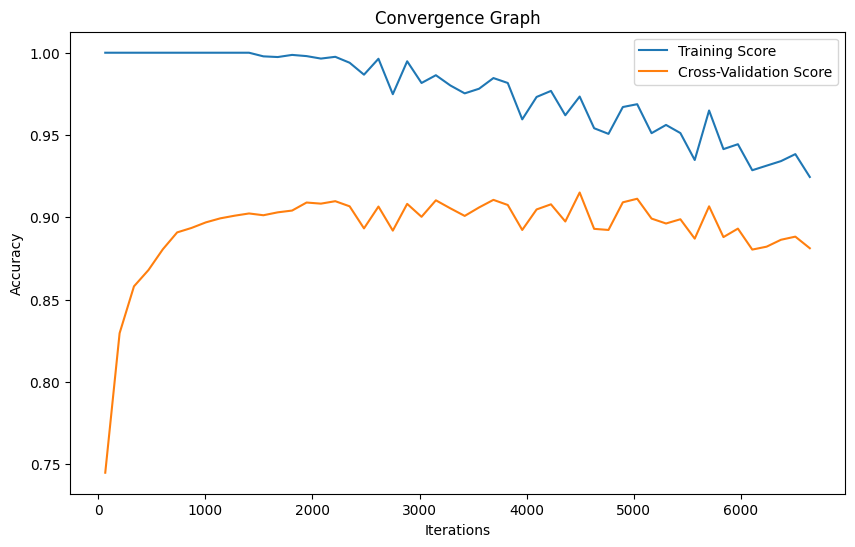

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()